In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C://Users/anush/Desktop/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


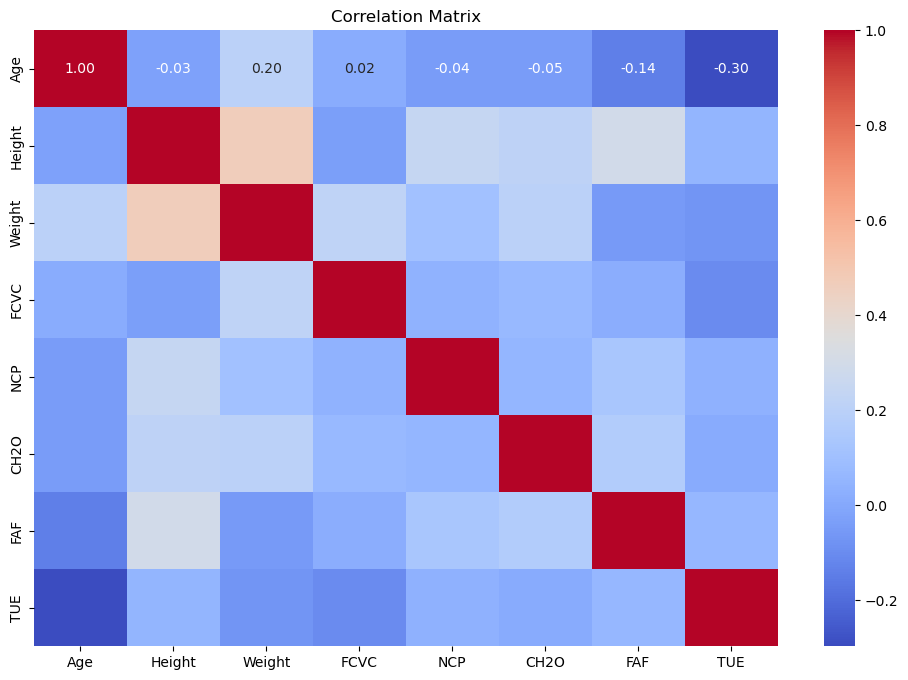

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_cols]

# Compute the correlation matrix
corr_matrix = df_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


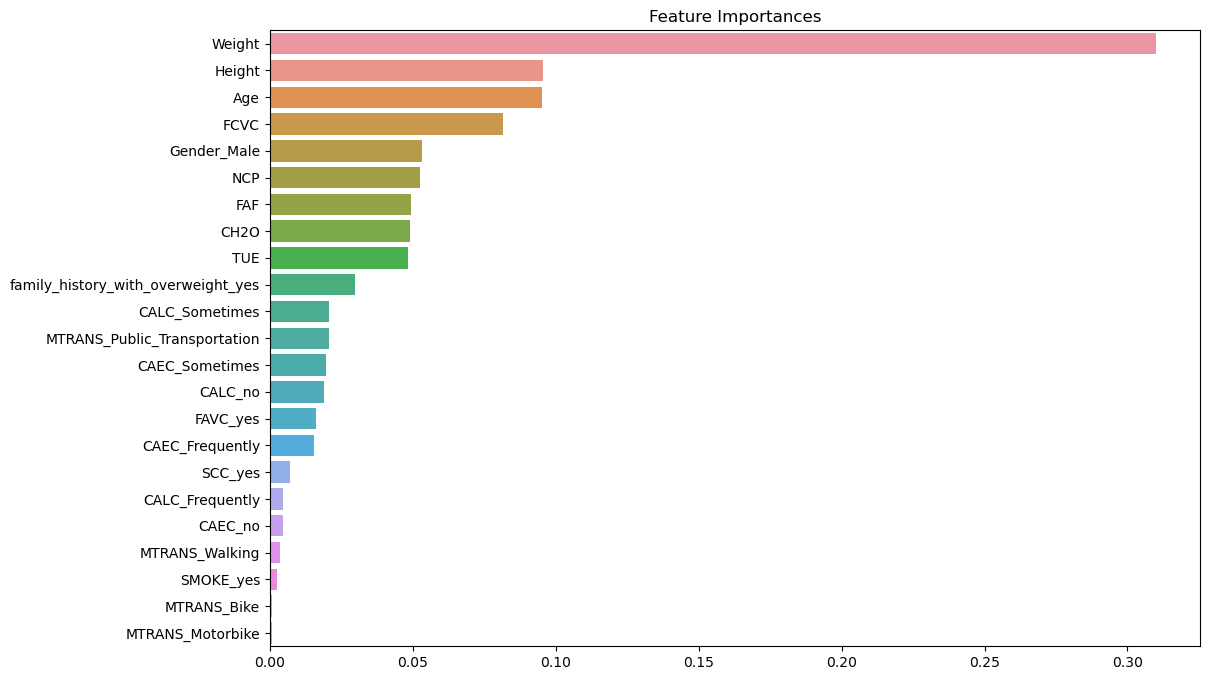

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Assuming the target variable is 'Target'
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Handle categorical variables before training the model
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Train a RandomForestClassifier to get feature importances
model = RandomForestClassifier(random_state=42)
model.fit(X_encoded, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()


In [17]:
import numpy as np

# Categorize TUE into low, medium, high usage groups
df['TUE_category'] = pd.cut(df['TUE'], bins=[-np.inf, 10, 20, np.inf], labels=['Low', 'Medium', 'High'])


In [19]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,TUE_category
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,Low
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,Low
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,Low
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,Low
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Low


In [23]:
# Identify the categorical columns to be one-hot encoded
categorical_columns = ['MTRANS', 'CALC']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,TUE,NObeyesdad,TUE_category,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CALC_Frequently,CALC_Sometimes,CALC_no
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,1.0,Normal_Weight,Low,False,False,True,False,False,False,True
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,0.0,Normal_Weight,Low,False,False,True,False,False,True,False
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,1.0,Normal_Weight,Low,False,False,True,False,True,False,False
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,0.0,Overweight_Level_I,Low,False,False,False,True,True,False,False
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,0.0,Overweight_Level_II,Low,False,False,True,False,False,True,False


In [25]:
# Check the column names after encoding to verify
print(df_encoded.columns)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'NObeyesdad', 'TUE_category', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no'],
      dtype='object')
